In [79]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std



# Linear Regressions


A linear regression is the “Best Fitting” line through a cloud of points.

The criterior that we will choose to decide which line is the "Best Fitting" is the sum of squared vertical deviations. We refer to the resulting estimator as Ordinary Least Squares (OLS)

https://fditraglia.shinyapps.io/regression/



# Example 1: College Data

Suppose we are interested in the relationship between SAT scores and college GPA. Is a high SAT score related to a high college GPA? Can we predict your college GPA based on your SAT score?
 
 Let's import the data and see. The variables we are interested in are:
 
**colgpa**:   College GPA on a four point scale

**sat**:      Combined SAT score (verbal plus math)




In [67]:
# Import data

collegeDataAll = pd.read_csv('college_gpa.csv')

collegeData = collegeDataAll[['sat','colgpa']]
collegeData.head()

,sat,colgpa
0,920,2.04
1,1170,4.00
2,810,1.78
3,940,2.42
4,1180,2.61


In [68]:
# Explore what the two variables look like

collegeData.describe()

,sat,colgpa
count,4137.000000,4137.000000
mean,1030.331158,2.652686
std,139.401392,0.658635
min,470.000000,0.000000
25%,940.000000,2.210000
50%,1030.000000,2.660000
75%,1120.000000,3.120000
max,1540.000000,4.000000


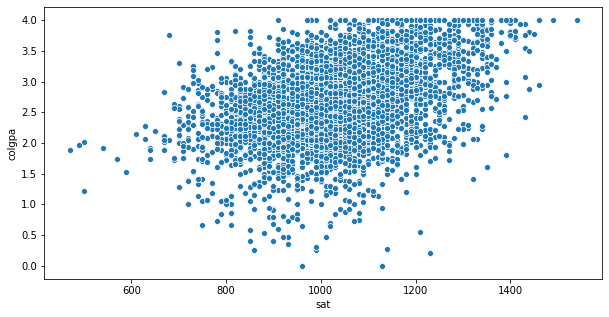

In [60]:
# Plot data with a scatter plot

fig,ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = collegeData, x='sat', y='colgpa')

Once we have had a look at the data, let's do our regression!

Our statistical model is:

\begin{equation}
\text{college GPA} = \alpha + \beta \ \text{SAT score} + \epsilon
\end{equation}

We are going to use OLS to get the coefficients.


In [76]:
# Do a linear regression (OLS)

model = smf.ols(formula = 'colgpa ~  sat', data = collegeData)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     829.3
Date:                Thu, 15 Aug 2019   Prob (F-statistic):          2.32e-166
Time:                        19:16:22   Log-Likelihood:                -3764.0
No. Observations:                4137   AIC:                             7532.
Df Residuals:                    4135   BIC:                             7545.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6631      0.070      9.510      0.0

In [75]:
# Extract parameters

print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('R2: ', results.rsquared)


Parameters:  Intercept          1.365159
C(athlete)[T.1]    0.119713
sat                0.001501
hsperc            -0.013772
dtype: float64
R2:  0.2748300352676304
Predicted values:  [2.31518804 2.841856   2.21485436 ... 3.3463169  1.9314083  3.32982314]


### Interpretation

Let's interpret the coefficients related to SAT (0.0019). What does it mean?

- First of all it is positive. That means that a higher SAT is associated with a higher college GPA.

- 100 points more in the SAT are associated to $100*0.0019 = 0.19$ points more in the college GPA.

- Is it statistically significant? Yes, look at the P-value and the confidence interval.

- Is it 'practically' significant? (is 0.19 a lot?)

- Does the SAT explain a lot of the variation in the college GPA? 

**Prediction**: if your SAT score was 1300, your college GPA will be around to $0.663 + 1300*0.0019 = 3.13$ 




### Fitted values



In [ ]:
print('Predicted values: ', results.predict())

array([0.60130261, 0.60133003, 0.60143859, ..., 0.60161558, 0.60126656,
       0.60182463])

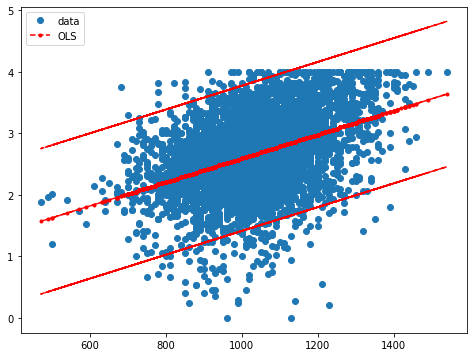

In [81]:
# Create confidence intervals
prstd, lowerBounds, upperBounds = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(collegeData['sat'], collegeData['colgpa'] , 'o', label="data")
ax.plot(collegeData['sat'], results.fittedvalues, 'r--.', label="OLS")
ax.plot(collegeData['sat'], lowerBounds, 'r--')
ax.plot(collegeData['sat'], upperBounds, 'r--')
ax.legend(loc='best');


## Multivariate linear regression

Let's do another linear regression, with two variables now. Let's add high school performance to the list of variables that might predict college GPA.
 
The variables we are interested in now are:
 
**colgpa**:   College GPA on a four point scale

**sat**:      Combined SAT score (verbal plus math)

**hsperc**   Percentile in HS graduating class (hsperc = 5 top 5%)

and our statistical model is 

\begin{equation}
\text{college GPA} = \alpha + \beta_1 \ \text{SAT score} +  \beta_2 \ \text{HS percentile} + \epsilon
\end{equation}


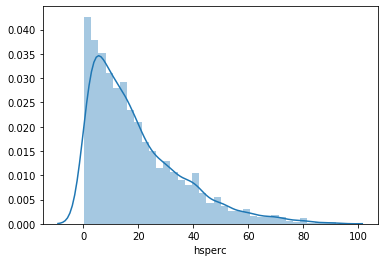

In [72]:
# Let's first have a look at what hsperc looks like
sns.distplot(collegeDataAll['hsperc'])


In [64]:
# Run the regression

model = smf.ols(formula = 'colgpa ~  sat + hsperc', data = collegeDataAll)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     777.9
Date:                Thu, 15 Aug 2019   Prob (F-statistic):          1.77e-287
Time:                        18:40:50   Log-Likelihood:                -3481.3
No. Observations:                4137   AIC:                             6969.
Df Residuals:                    4134   BIC:                             6988.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3918      0.072     19.454      0.0

### Interpretation

- What is the coefficient on HS percentile?

- What happened to the coefficient on SAT score once we introduced HS percentile? Why do you think that is?

**Research** : how many variables and which variables should I include in a regression? This is not an easy question at all! :)


## Dummy Variables, or difference in intercept

Suppose we want to check whether women have higher or lower GPA (formally, if the intercept is higher for athlethes)

We want to use the variable:

**female**:  Dummy variable equal to 1 if an athlete




In [89]:
## Let's check what the variable female looks like
collegeDataAll.head(10)
plt.hist(collegeDataAll['female'])

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black
0,920,43,2.04,1,0.48387,0.10,4,40.000000,1,0,0
1,1170,18,4.00,0,0.82813,9.40,191,20.319149,0,1,0
2,810,14,1.78,1,0.88372,1.19,42,35.294117,0,1,0
3,940,40,2.42,0,0.80769,5.71,252,44.133099,0,1,0
4,1180,18,2.61,0,0.73529,2.14,86,40.186916,0,1,0
5,980,114,3.03,0,0.81481,2.68,41,15.298508,1,1,0
6,880,78,1.84,0,0.76000,3.11,161,51.768490,0,0,0
7,980,55,3.05,0,0.88462,2.68,101,37.686565,0,1,0
8,1240,18,3.00,0,0.69863,3.67,161,43.869209,0,1,0
9,1230,17,2.00,0,0.86364,0.10,3,30.000000,0,1,0


In [93]:
## Dummy variables

model = smf.ols(formula = 'colgpa ~  sat + hsperc + C(female)', data = collegeDataAll)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     549.9
Date:                Thu, 15 Aug 2019   Prob (F-statistic):          9.81e-301
Time:                        19:33:53   Log-Likelihood:                -3447.3
No. Observations:                4137   AIC:                             6903.
Df Residuals:                    4133   BIC:                             6928.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1908      0.075     15.

## Interactions, or difference in slopes

What about, is it the case that women with a high SAT score perform better than men with a high SAT score?


In [97]:
model = smf.ols(formula = 'colgpa ~  sat + hsperc  + C(female) +  hsperc*C(female)', data = collegeDataAll)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     412.7
Date:                Thu, 15 Aug 2019   Prob (F-statistic):          1.62e-299
Time:                        19:36:10   Log-Likelihood:                -3446.9
No. Observations:                4137   AIC:                             6904.
Df Residuals:                    4132   BIC:                             6935.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.17

# Exercise:


- Report how many athletes there are in the school.
- Do athletes have a higher GPA on average? Is the difference significant?
- Run a regression of college GPA on Sat scores, using two different intercept for athlethes and non athletes. Report the coefficients and plot the data and the regression curves.

Bonus:

- Is the probability of being an athlete higher if the student comes from a bigger high school? (use OLS, we will see logit/probit in the future). 


For this exercise, on top of the ones we used already, use the variables:
**athlete**: Dummy variable equal to 1 if an athlete
**hsize**:   Size of high school (HS) graduating class in hundreds

In [134]:
# Report how many athletes there are in the school.
print('Total number of students:', collegeDataAll['athlete'].count())
print('Total number of athletes:', collegeDataAll['athlete'].sum())

Total number of students: 4137
Total number of athletes: 194


In [139]:
# Do athletes have a higher GPA on average? Is the difference significant?

# Do it with means
print(collegeDataAll['colgpa'][ collegeDataAll['athlete']==0].mean())
print(collegeDataAll['colgpa'][ collegeDataAll['athlete']==1].mean())

# And then do a test like Jeni showed

# Or, do it with a regression
results = smf.ols(formula = 'colgpa ~   C(athlete)', data = collegeDataAll).fit()
print(results.summary())

2.3814948357872128
2.6660284029894785
                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     34.79
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           3.97e-09
Time:                        09:29:21   Log-Likelihood:                -4124.8
No. Observations:                4137   AIC:                             8254.
Df Residuals:                    4135   BIC:                             8266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Inte

In [162]:
# Run a regression of college GPA on Sat scores, using two different intercept for athlethes and non athletes,
# and report the coefficients.
results = smf.ols(formula = 'colgpa ~  sat + C(athlete)', data = collegeDataAll).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     415.3
Date:                Fri, 16 Aug 2019   Prob (F-statistic):          4.46e-165
Time:                        09:48:03   Log-Likelihood:                -3763.4
No. Observations:                4137   AIC:                             7533.
Df Residuals:                    4134   BIC:                             7552.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6801      0.071     

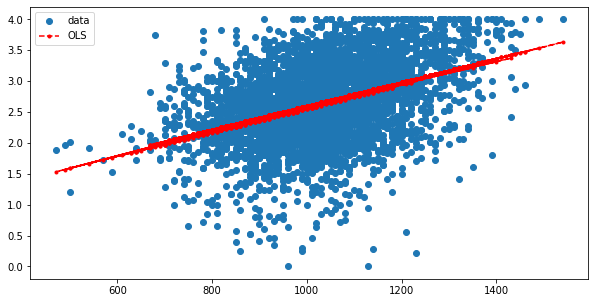

In [163]:
# Plot the data and the regression curve
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(collegeDataAll['sat'], collegeDataAll['colgpa'] , 'o', label="data")
ax.plot(collegeDataAll['sat'], results.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

In [146]:
# Bonus: Is the probability of being an athlete higher if the student comes from a bigger high school? (use OLS)
results = smf.ols(formula = ' athlete ~  hsize ', data = collegeDataAll).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                athlete   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.07
Date:                Fri, 16 Aug 2019   Prob (F-statistic):            0.00152
Time:                        09:32:04   Log-Likelihood:                 563.57
No. Observations:                4137   AIC:                            -1123.
Df Residuals:                    4135   BIC:                            -1110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0301      0.006      4.830      0.0

# Some things to keep in mind when we run regressions

## Linear Regressions Can Only Capture Linear Relationships

Suppose for example that the true model is quadratic. That is, $ y = 1 + 1.2 x^2 + \epsilon $, but we run a linear projection instead.


In [107]:
# Let's simulated some data to illustrate the concept

np.random.seed(9)
nsample = 100

beta = 1.2
constant = 1*np.ones( 100)

x = np.linspace(-10, 10, 100)        # first we create a variable x 
e = np.random.normal(size=nsample) # then we create some random noise e
y = constant + beta*np.square(x) + e          # then we create y by adding up x and e

# Put it into a pandas dataframe

simulatedData = pd.DataFrame({'Y': y, 'X': x})
simulatedData.head()

,Y,X
0,151.001109,-10.000000
1,144.711068,-9.797980
2,138.007595,-9.595960
3,133.356263,-9.393939
4,127.358706,-9.191919


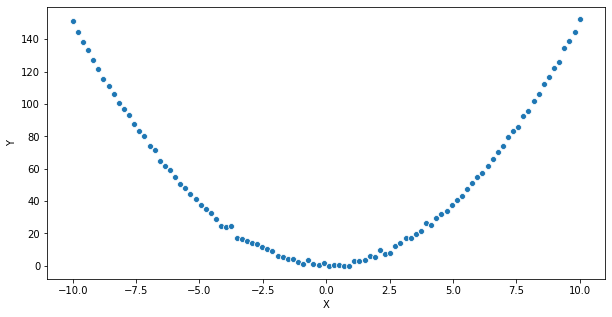

In [108]:
# Draw a scatterplot

fig,ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = simulatedData, x='X', y='Y')

In [110]:
results = smf.ols(formula = 'y ~  x', data = simulatedData).fit()
print(results.summary()
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y , 'o', label="data")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 7.187e-07
Date:                Thu, 15 Aug 2019   Prob (F-statistic):              0.999
Time:                        20:06:23   Log-Likelihood:                -524.16
No. Observations:                 100   AIC:                             1052.
Df Residuals:                      98   BIC:                             1058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.9972      4.619     11.258      0.0

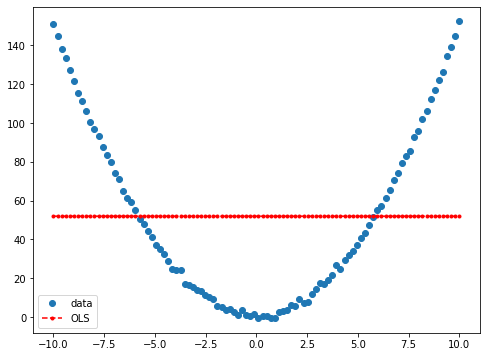

If you see that is the case, all you need to do is to run a regression on $x^2$. Sometimes you have to take logs instead or do some other transformation. It depends on what the data looks like.

## Outliers

Outliers can influence the results of the regression pretty heavily. Suppose the true model is, $ y = 1 + 1.2 x^2 + \epsilon $, but for some reason some observation in $y$ came out super high.


In [114]:
# Let's simulated some data to illustrate the concept

np.random.seed(9)
nsample = 100

beta = 1.2
constant = 1*np.ones( 100)

x = np.linspace(0, 10, 100)        # first we create a variable x 
e = np.random.normal(size=nsample) # then we create some random noise e
y = constant + beta*x + e          # then we create y by adding up x and e
y[-1] = 100;

# Put it into a pandas dataframe

simulatedData = pd.DataFrame({'Y': y, 'X': x})
simulatedData.tail()

,Y,X
95,10.861490,9.59596
96,14.004356,9.69697
97,12.782682,9.79798
98,12.483306,9.89899
99,100.000000,10.00000


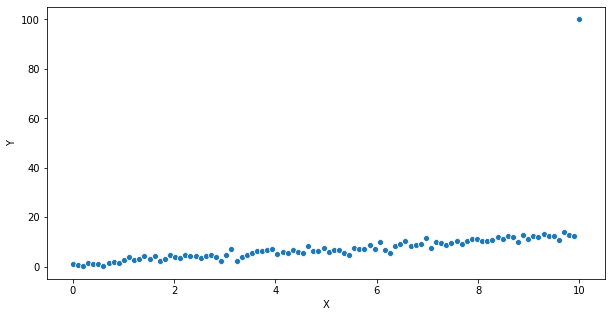

In [115]:
# Draw a scatterplot
fig,ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = simulatedData, x='X', y='Y')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     32.69
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           1.17e-07
Time:                        20:16:06   Log-Likelihood:                -357.03
No. Observations:                 100   AIC:                             718.1
Df Residuals:                      98   BIC:                             723.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6695      1.724     -0.388      0.6

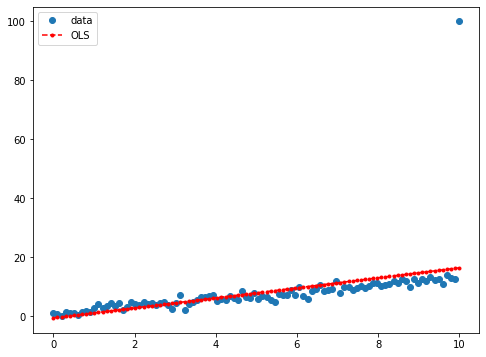

In [117]:
# Run regression and plot results

results = smf.ols(formula = 'y ~  x', data = simulatedData).fit()
print(results.summary())

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y , 'o', label="data")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           6.25e-54
Time:                        20:37:29   Log-Likelihood:                -144.54
No. Observations:                  99   AIC:                             293.1
Df Residuals:                      97   BIC:                             298.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0202      0.210      4.858      0.0

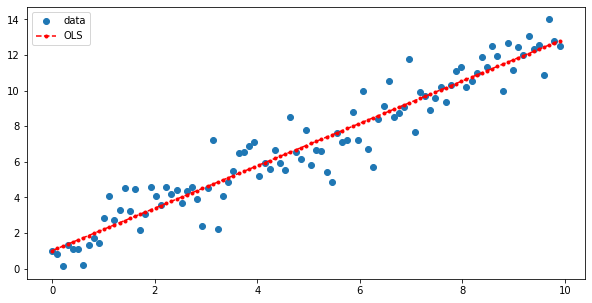

In [123]:
# Let's get rid of the outliers

simulatedDataClean = simulatedData[simulatedData['Y']<simulatedData['Y'].quantile(0.99)]

results = smf.ols(formula = 'Y ~  X', data = simulatedDataClean).fit()
print(results.summary())

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(simulatedDataClean['X'], simulatedDataClean['Y'] , 'o', label="data")
ax.plot(simulatedDataClean['X'], results.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');





# Exercise

- Draw a histogram of high school sizes in the sample
- Get rid of the 1st and 99th percentile of high school size and draw a histogram again
- Fit a quadratic regression using high school size to predict college GPA. Summarize your results.
- Is there evidence that adding a quadratic term improves the quality of our predictions?


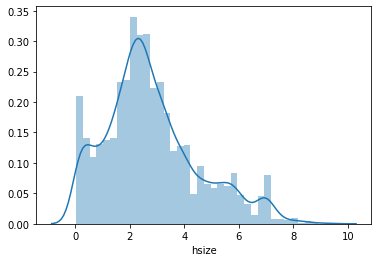

In [147]:
# Draw a histogram of high school sizes in the sample
sns.distplot(collegeDataAll['hsize'])

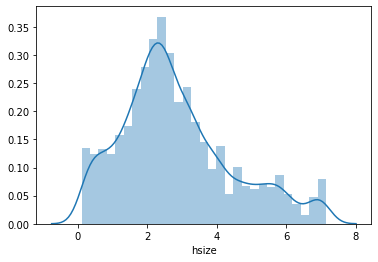

In [149]:
# Get rid of the 1st and 99th percentile of high school size
collegeDataClean = collegeDataAll[collegeDataAll['hsize']<collegeDataAll['hsize'].quantile(0.99)]
collegeDataClean = collegeDataClean[collegeDataClean['hsize']>collegeDataClean['hsize'].quantile(0.01)]
sns.distplot(collegeDataClean['hsize'])

In [161]:
# Fit a quadratic regression using high school size to predict college GPA

# First create hsize squared
hsize = np.array(collegeDataClean['hsize'])
collegeDataClean['hsizeSquared'] = pd.DataFrame(hsizeSquared)

# Run the regression
results = smf.ols(formula = 'colgpa ~  hsize + hsizeSquared', data = collegeDataClean).fit()

collegeDataClean['hsize'].describe()

count    3953.000000
mean        2.833863
std         1.611536
min         0.110000
25%         1.760000
50%         2.540000
75%         3.680000
max         7.150000
Name: hsize, dtype: float64

In [156]:
# Summarize your results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.058
Date:                Fri, 16 Aug 2019   Prob (F-statistic):              0.128
Time:                        09:41:29   Log-Likelihood:                -3801.2
No. Observations:                3796   AIC:                             7608.
Df Residuals:                    3793   BIC:                             7627.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.6853      0.024    112.350   

## Correlation is not causation!

Let's see what happens if we run a regression of consumption of margarine butter on divorces in Maine. These are real data taken from Census and US Department of Agriculture.

In [1]:
crazyData = pd.read_csv('margarine_and_divorce.csv')
crazyData.head()

NameError: name 'pd' is not defined

In [2]:
model = smf.ols(formula = 'divorce_rate_maine ~  margarine_consumption', data = crazyData)
results = model.fit()
print(results.summary())

NameError: name 'smf' is not defined

Is this telling us that the fact that people eat more butter is leading to more divorces in Maine?!

Not really, what's going on is that these variables happen to be strongly correlated by chance, because they are both going down over time: http://tylervigen.com/spurious-correlations

## Error Distribution and Central Limit Theorem

Do the errors need to be normally distributed to perform tests and calculate confidence intervals?

It depends. There is a cool theorem called Central Limit Theorem that says that under some assumptions, if the errors are independent and identically distributed and if we have enough observations (say, more than a hundred?) then the estimators for the coefficients will be normally distributed regardless of the error distribution, so we have no problem for doing all the tests.

# Extra

What about clustering, robust standard errors, panel data regressions, generalized least squares, maximum likelihood estimation, time series, vector autoregressions ...? 

Check out the statsmodels documentation!

https://www.statsmodels.org/stable/regression.html
https://www.statsmodels.org/stable/index.html

